The dataset consists of a list of items sold for a Supermarket across cities of Myanmar:

**Invoice ID:** Computer generated sales slip invoice identification number

**Branch:** Branch of supercenter (3 branches are available identified by A, B and C).

**City:** Location of supercenters

**Customer type:** Type of customers, recorded by Members for customers using member card and Normal for without member card

**Gender:** Gender type of customer

**Product line:** General item categorization groups

**Unit price:** Price of each product in $

**Quantity:** Number of products purchased by customer

**Tax 5%:** 5% tax fee for customer buying

**Total:** Total price including tax

**Date:** Date of purchase

**Time:** Purchase time

**Payment:** Payment used by customer for purchase

**cogs:** Cost of goods sold

**gross margin percentage:** Gross margin percentage

**gross income:** Gross income

**Rating:** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# Importing Libaries and Dataset

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
warnings.filterwarnings('ignore')

**Loading Data into Colab**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving supermarket_sales.csv to supermarket_sales.csv


In [3]:
supermarket_df = pd.read_csv(io.StringIO(uploaded['supermarket_sales.csv'].decode('utf-8')))

**Inspecting First Few Rows of the DataFrame**

In [4]:
supermarket_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Let's look at the datatype and the number of non-null values in the netflix dataframe**

In [5]:
supermarket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Very fortunate of have no null-values in the dataset

**Type Conversion**

Lets convert Date column to Date format

In [6]:
supermarket_df['Date'] = pd.to_datetime(supermarket_df['Date'])
supermarket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

**Unique Values in each column**

Before we move ahead, let's identify which columns in the dataframe can be used as unique identifier for each row

In [7]:
for i in supermarket_df.columns:
  print(f'{i} has {supermarket_df[i].nunique()} unique values')

Invoice ID has 1000 unique values
Branch has 3 unique values
City has 3 unique values
Customer type has 2 unique values
Gender has 2 unique values
Product line has 6 unique values
Unit price has 943 unique values
Quantity has 10 unique values
Tax 5% has 990 unique values
Total has 990 unique values
Date has 89 unique values
Time has 506 unique values
Payment has 3 unique values
cogs has 990 unique values
gross margin percentage has 1 unique values
gross income has 990 unique values
Rating has 61 unique values


**So, Invoice ID is the unique identifier of any row in the dataset**

# Let's identify shopping hours across various supermarkets in Myanmar

In [8]:
# Creating Hours Column

supermarket_df['Hours'] = supermarket_df['Time'].map(lambda x : x.split(":")[0])

In [17]:
supermarket_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hours
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10


In [9]:
# Getting Day of the week

supermarket_df['Day_of_Week'] = supermarket_df['Date'].dt.day_name()
supermarket_df['Day_of_Week']

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: Day_of_Week, Length: 1000, dtype: object

In [10]:
supermarket_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hours,Day_of_Week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10,Friday


In [11]:
# Creating a Function to tag day of the week as weekday or weekend

def IsWeekend(x):

  if x in ['Saturday','Sunday']:

    return 'Yes'

  else:

    return 'No'

supermarket_df['Weekend'] = supermarket_df['Day_of_Week'].apply(IsWeekend)

In [12]:
supermarket_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hours,Day_of_Week,Weekend
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13,Saturday,Yes
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10,Friday,No
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13,Sunday,Yes
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20,Sunday,Yes
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10,Friday,No


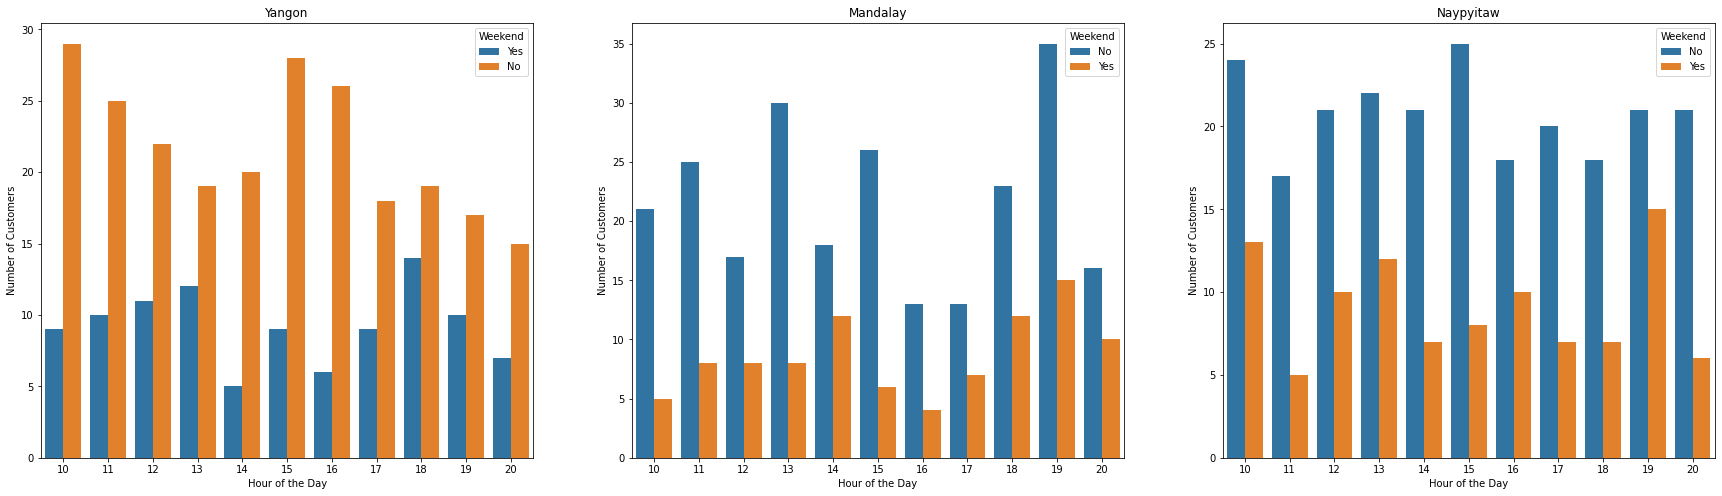

In [33]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
sns.countplot(data=supermarket_df[supermarket_df['City'] == 'Yangon'], 
              x="Hours", 
              order = sorted(list(supermarket_df[supermarket_df['City'] == 'Yangon']['Hours'].value_counts().index)), 
              hue = 'Weekend')
plt.ylabel('Number of Customers')
plt.xlabel('Hour of the Day')
plt.title('Yangon')
plt.subplot(1,3,2)
sns.countplot(data=supermarket_df[supermarket_df['City'] == 'Mandalay'], 
              x="Hours", 
              order = sorted(list(supermarket_df[supermarket_df['City'] == 'Mandalay']['Hours'].value_counts().index)), 
              hue = 'Weekend')
plt.ylabel('Number of Customers')
plt.xlabel('Hour of the Day')
plt.title('Mandalay')
plt.subplot(1,3,3)
sns.countplot(data=supermarket_df[supermarket_df['City'] == 'Naypyitaw'], 
              x="Hours", 
              order = sorted(list(supermarket_df[supermarket_df['City'] == 'Naypyitaw']['Hours'].value_counts().index)), 
              hue = 'Weekend')
plt.ylabel('Number of Customers')
plt.xlabel('Hour of the Day')
plt.title('Naypyitaw')
plt.show()

# Let's Analyze Correlation between Gender and the Kind of Items they Purchase across different cities of Myanmar

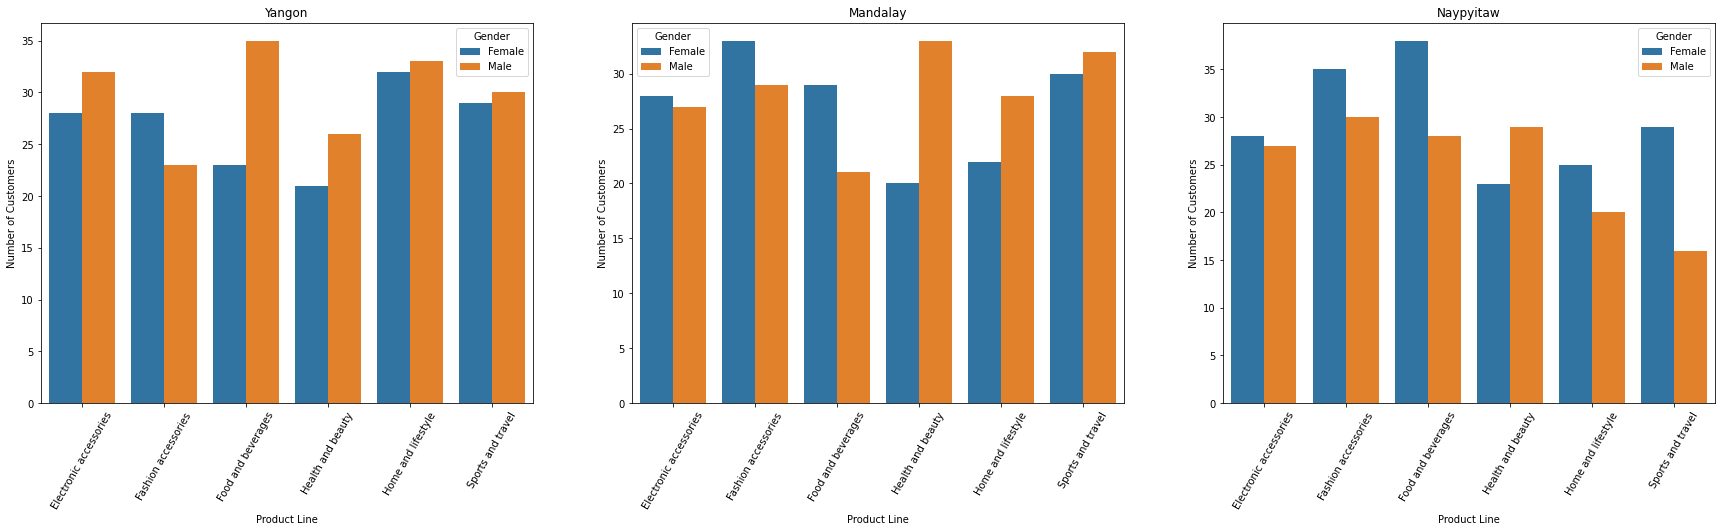

In [35]:
plt.figure(figsize=(30,7))
plt.subplot(1,3,1)
sns.countplot(data=supermarket_df[supermarket_df['City'] == 'Yangon'], 
              x="Product line", 
              order = sorted(list(supermarket_df[supermarket_df['City'] == 'Yangon']['Product line'].value_counts().index)), 
              hue = 'Gender')
plt.ylabel('Number of Customers')
plt.xlabel('Product Line')
plt.xticks(rotation=60)
plt.title('Yangon')
plt.subplot(1,3,2)
sns.countplot(data=supermarket_df[supermarket_df['City'] == 'Mandalay'], 
              x="Product line", 
              order = sorted(list(supermarket_df[supermarket_df['City'] == 'Mandalay']['Product line'].value_counts().index)), 
              hue = 'Gender')
plt.ylabel('Number of Customers')
plt.xlabel('Product Line')
plt.xticks(rotation=60)
plt.title('Mandalay')
plt.subplot(1,3,3)
sns.countplot(data=supermarket_df[supermarket_df['City'] == 'Naypyitaw'], 
              x="Product line", 
              order = sorted(list(supermarket_df[supermarket_df['City'] == 'Naypyitaw']['Product line'].value_counts().index)), 
              hue = 'Gender')
plt.ylabel('Number of Customers')
plt.xlabel('Product Line')
plt.xticks(rotation=60)
plt.title('Naypyitaw')
plt.show()

# Type of Customers in Different Cities

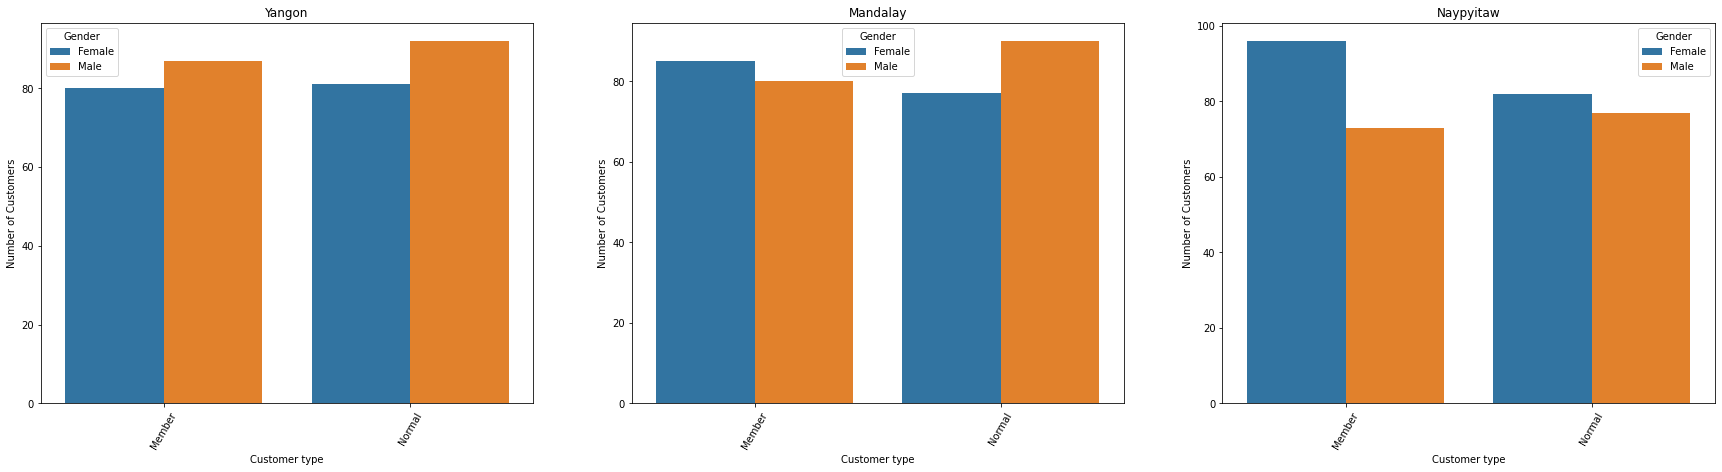

In [34]:
plt.figure(figsize=(30,7))
plt.subplot(1,3,1)
sns.countplot(data=supermarket_df[supermarket_df['City'] == 'Yangon'], 
              x="Customer type", 
              order = sorted(list(supermarket_df[supermarket_df['City'] == 'Yangon']['Customer type'].value_counts().index)), 
              hue = 'Gender')
plt.ylabel('Number of Customers')
plt.xlabel('Customer type')
plt.xticks(rotation=60)
plt.title('Yangon')
plt.subplot(1,3,2)
sns.countplot(data=supermarket_df[supermarket_df['City'] == 'Mandalay'], 
              x="Customer type", 
              order = sorted(list(supermarket_df[supermarket_df['City'] == 'Mandalay']['Customer type'].value_counts().index)), 
              hue = 'Gender')
plt.ylabel('Number of Customers')
plt.xlabel('Customer type')
plt.xticks(rotation=60)
plt.title('Mandalay')
plt.subplot(1,3,3)
sns.countplot(data=supermarket_df[supermarket_df['City'] == 'Naypyitaw'], 
              x="Customer type", 
              order = sorted(list(supermarket_df[supermarket_df['City'] == 'Naypyitaw']['Customer type'].value_counts().index)), 
              hue = 'Gender')
plt.ylabel('Number of Customers')
plt.xlabel('Customer type')
plt.xticks(rotation=60)
plt.title('Naypyitaw')
plt.show()

# Payment Mode Across Different Cities of Myanmar

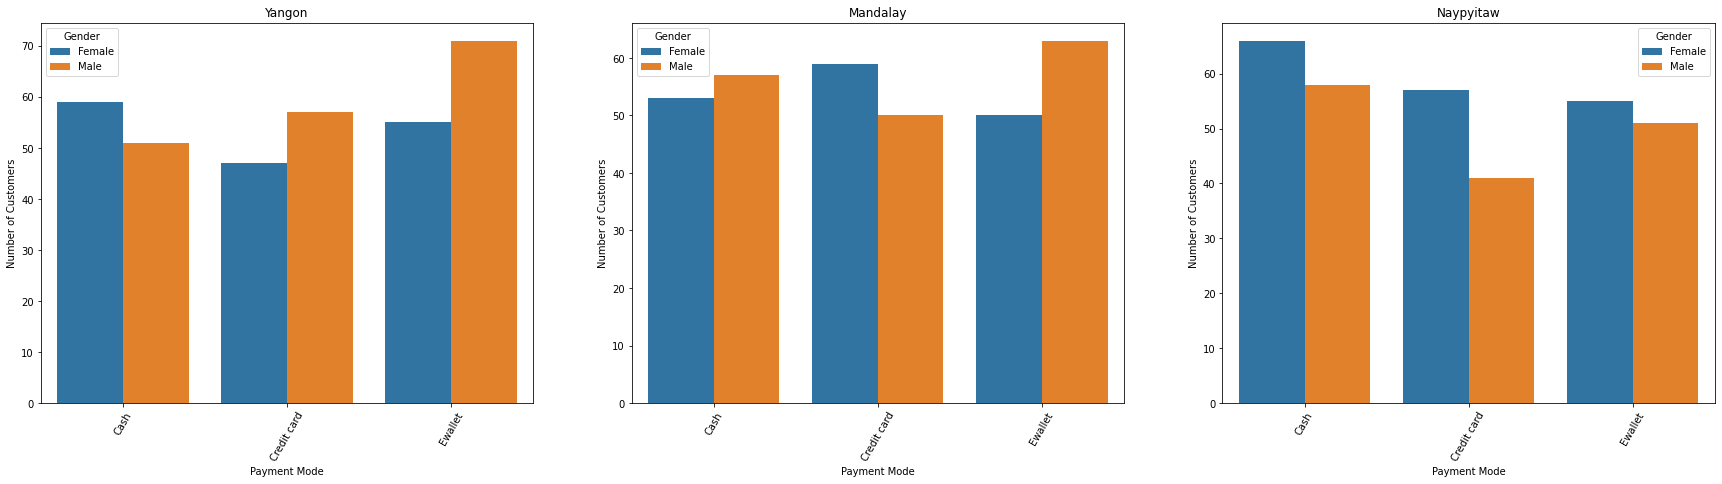

In [36]:
plt.figure(figsize=(30,7))
plt.subplot(1,3,1)
sns.countplot(data=supermarket_df[supermarket_df['City'] == 'Yangon'], 
              x="Payment", 
              order = sorted(list(supermarket_df[supermarket_df['City'] == 'Yangon']['Payment'].value_counts().index)), 
              hue = 'Gender')
plt.ylabel('Number of Customers')
plt.xlabel('Payment Mode')
plt.xticks(rotation=60)
plt.title('Yangon')
plt.subplot(1,3,2)
sns.countplot(data=supermarket_df[supermarket_df['City'] == 'Mandalay'], 
              x="Payment", 
              order = sorted(list(supermarket_df[supermarket_df['City'] == 'Mandalay']['Payment'].value_counts().index)), 
              hue = 'Gender')
plt.ylabel('Number of Customers')
plt.xlabel('Payment Mode')
plt.xticks(rotation=60)
plt.title('Mandalay')
plt.subplot(1,3,3)
sns.countplot(data=supermarket_df[supermarket_df['City'] == 'Naypyitaw'], 
              x="Payment", 
              order = sorted(list(supermarket_df[supermarket_df['City'] == 'Naypyitaw']['Payment'].value_counts().index)), 
              hue = 'Gender')
plt.ylabel('Number of Customers')
plt.xlabel('Payment Mode')
plt.xticks(rotation=60)
plt.title('Naypyitaw')
plt.show()